In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time
from numpy import mean
import pandas as pd

# Validation Set Approach

In [60]:
# load the boston dataset
boston = datasets.load_boston(return_X_y=False)
  
# defining feature matrix(X) and response vector(y)
X = boston.data
y = boston.target

# Create the pandas DataFrame to store mse values
df = pd.DataFrame()

#different split ratio
for j in [.2,.4]:

    #list to store mse values
    mse_list=[]
    
    #different random state 
    for i in range(1,21):
        
        # splitting X and y into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=j,random_state=i)

        # create linear regression object
        reg = linear_model.LinearRegression()

        # train the model using the training sets
        reg.fit(X_train, y_train)

        #predict
        y_pred=reg.predict(X_test)

        #calculate mse on test data
        mse=mean_squared_error(y_test,y_pred)
        
        #add mse value to list
        mse_list.append(mse)
    
    #add mse values for gievn split to dataframe
    df[j]=mse_list
     

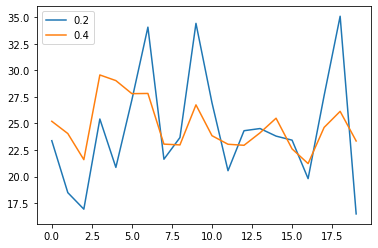

In [61]:
df.plot()

# Leave One Out Cross Validation

In [62]:
from sklearn.model_selection import LeaveOneOut

# load the boston dataset
boston = datasets.load_boston(return_X_y=False)  

# defining feature matrix(X) and response vector(y)
X = boston.data
y = boston.target

# create loocv procedure
cv = LeaveOneOut()

# enumerate splits
y_true, y_pred = list(), list()

#record start time
start_time = time.time()

for train_ix, test_ix in cv.split(X):
    #print(test_ix)
    #print(train_ix)
    
    # split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    
    # fit model
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    # evaluate model
    yhat = model.predict(X_test)
    # store
    y_true.append(y_test[0])
    y_pred.append(yhat[0])

#calculate run time
print("--- %s seconds ---" % (time.time() - start_time))

# calculate mse
mse = mean_squared_error(y_true, y_pred)
mse

--- 0.42287588119506836 seconds ---


23.725745519476096

# k-fold cross-validation

In [63]:
#k-fold cross-validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# load the boston dataset
boston = datasets.load_boston(return_X_y=False)  
# defining feature matrix(X) and response vector(y)
X = boston.data
y = boston.target

# Create the pandas DataFrame to store mse values
df = pd.DataFrame()

#different values of k
for j in [10,20,30]:
    
    #list to store mse values
    mse_list=[]
    
    #different random state 
    for i in range(1,20):
    
        #record start time
        #start_time = time.time()
        
        # prepare the cross-validation procedure
        cv = KFold(n_splits=j, random_state=i, shuffle=True)

        # create model
        model = linear_model.LinearRegression()

        # evaluate model
        scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
        
        #calculate run time
        #print("--- %s seconds ---" % (time.time() - start_time))
        
        #add mse value to list
        mse=mean(scores)
        mse_list.append(mse)
        
        #print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
        
    #add mse values for gievn split to dataframe
    df[j]=mse_list

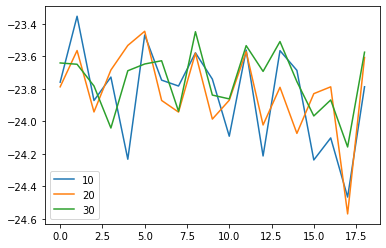

In [64]:
df.plot()

In [65]:
df.mean()

10   -23.840549
20   -23.813703
30   -23.748592
dtype: float64

In [66]:
df.std()

10    0.301529
20    0.258280
30    0.189790
dtype: float64

# LOOCV Again

In [72]:
# load the boston dataset
boston = datasets.load_boston(return_X_y=False)  

# defining feature matrix(X) and response vector(y)
X = boston.data
y = boston.target
   
#record start time
start_time = time.time()

# prepare the cross-validation procedure
cv = LeaveOneOut()

# create model
model = linear_model.LinearRegression()

# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#calculate run time
print("--- %s seconds ---" % (time.time() - start_time))
    
mean(scores)

--- 0.32369494438171387 seconds ---


-23.725745519476096